### Bước 1: Khai báo thư viện

In [1]:
#Khai báo thư viện
import pandas as pd # Đọc dữ liệu
import numpy as np # Xử lý dữ liệu
import matplotlib.pyplot as plt # Vẽ biểu đồ

# Các thư viện xây dựng mô hình
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
import warnings

#Kiểm tra độ chính xác mô hình
from sklearn.metrics import r2_score # Đo mức độ phù hợp
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import mean_absolute_error # Đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error # Đo phần trăm sai số tuyệt đối trung bình

### Bước 2: Đọc dữ liệu

In [2]:
# Chuẩn bị dữ liệu
df = pd.read_csv('BID Historical Data.csv')

### Bước 3: Mô tả dữ liệu

In [3]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-12-01,19516.3,19592.8,19631.1,19439.7,1.65M,-0.58%
1,2017-12-04,19516.3,19669.3,20052.0,19516.3,1.27M,0.00%
2,2017-12-05,19057.0,19669.3,19669.3,19057.0,3.06M,-2.35%
3,2017-12-06,19018.8,18904.0,19057.0,18750.9,2.33M,-0.20%
4,2017-12-07,19133.6,19133.6,19248.4,18789.2,808.64K,0.60%
...,...,...,...,...,...,...,...
1324,2023-03-27,46000.0,45550.0,46150.0,45000.0,672.20K,0.99%
1325,2023-03-28,46000.0,46500.0,46800.0,46000.0,504.00K,0.00%
1326,2023-03-29,46200.0,46000.0,46350.0,45550.0,303.10K,0.43%
1327,2023-03-30,46200.0,46250.0,46600.0,46200.0,699.70K,0.00%


In [4]:
# Kích thước dữ liệu
df.shape

(1329, 7)

In [5]:
# Xem dữ liệu 10 dòng đầu
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-12-01,19516.3,19592.8,19631.1,19439.7,1.65M,-0.58%
1,2017-12-04,19516.3,19669.3,20052.0,19516.3,1.27M,0.00%
2,2017-12-05,19057.0,19669.3,19669.3,19057.0,3.06M,-2.35%
3,2017-12-06,19018.8,18904.0,19057.0,18750.9,2.33M,-0.20%
4,2017-12-07,19133.6,19133.6,19248.4,18789.2,808.64K,0.60%
5,2017-12-08,19133.6,19171.8,19286.7,18865.7,1.07M,0.00%
6,2017-12-11,18368.2,18291.7,18980.5,18291.7,1.56M,-4.00%
7,2017-12-12,18444.8,18368.2,18674.4,17105.4,3.29M,0.42%
8,2017-12-13,18291.7,18444.8,18521.3,18100.4,2.54M,-0.83%
9,2017-12-14,18712.6,18215.2,18750.9,17794.2,1.85M,2.30%


In [6]:
# Xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1329 non-null   object 
 1   Price     1329 non-null   float64
 2   Open      1329 non-null   float64
 3   High      1329 non-null   float64
 4   Low       1329 non-null   float64
 5   Vol.      1329 non-null   object 
 6   Change %  1329 non-null   object 
dtypes: float64(4), object(3)
memory usage: 72.8+ KB


In [32]:
# Mô tả bộ dữ liệu
df.describe()

,Price,Open,High,Low
count,1063.000000,1063.000000,1063.000000,1063.000000
mean,30189.112041,30175.538852,30662.898401,29737.246754
std,5764.318777,5773.341240,5848.980505,5699.143401
min,16531.400000,16378.300000,17602.900000,15957.400000
25%,25887.750000,25792.100000,26374.450000,25485.900000
50%,30843.300000,30865.700000,31226.000000,30585.300000
75%,33675.300000,33706.650000,34243.100000,33215.900000
max,49000.000000,49500.000000,49950.000000,48100.000000


### Bước 4: Tiền xử lý dữ liệu

In [19]:
#Định dạng lại cột Date từ obj -> datetime
df['Date'] = pd.to_datetime(df['Date'])
# Chuyển cột Date làm index để lập biểu đồ so sánh về sau
df.index = df.Date
df.drop('Date', axis=1, inplace=True)

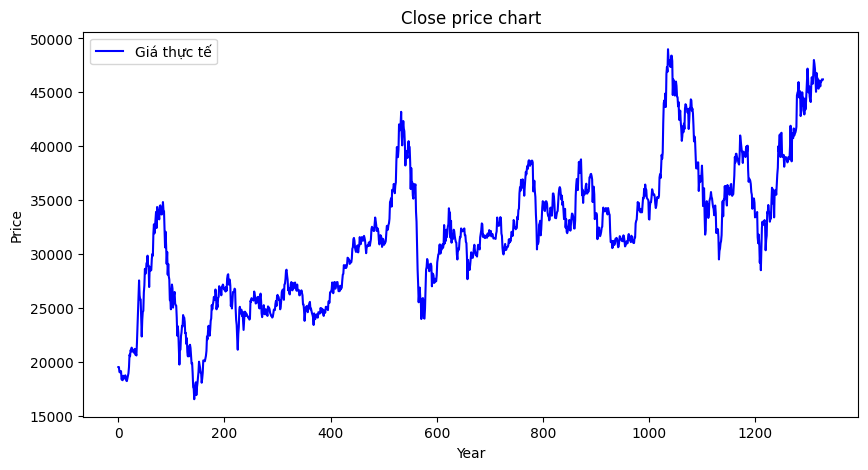

In [7]:
#Lập biểu đồ giá đóng
plt.figure(figsize=(10,5))
plt.plot(df['Price'], label='Giá thực tế', color='blue')
plt.title('Close price chart')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [55]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-12-01,19516.3,19592.8,19631.1,19439.7,1.65M,-0.58%
1,2017-12-04,19516.3,19669.3,20052.0,19516.3,1.27M,0.00%
2,2017-12-05,19057.0,19669.3,19669.3,19057.0,3.06M,-2.35%
3,2017-12-06,19018.8,18904.0,19057.0,18750.9,2.33M,-0.20%
4,2017-12-07,19133.6,19133.6,19248.4,18789.2,808.64K,0.60%
...,...,...,...,...,...,...,...
1324,2023-03-27,46000.0,45550.0,46150.0,45000.0,672.20K,0.99%
1325,2023-03-28,46000.0,46500.0,46800.0,46000.0,504.00K,0.00%
1326,2023-03-29,46200.0,46000.0,46350.0,45550.0,303.10K,0.43%
1327,2023-03-30,46200.0,46250.0,46600.0,46200.0,699.70K,0.00%


In [8]:
df = df.loc[:, ['Price']]
df

,Price
0,19516.3
1,19516.3
2,19057.0
3,19018.8
4,19133.6
...,...
1324,46000.0
1325,46000.0
1326,46200.0
1327,46200.0


<AxesSubplot: >

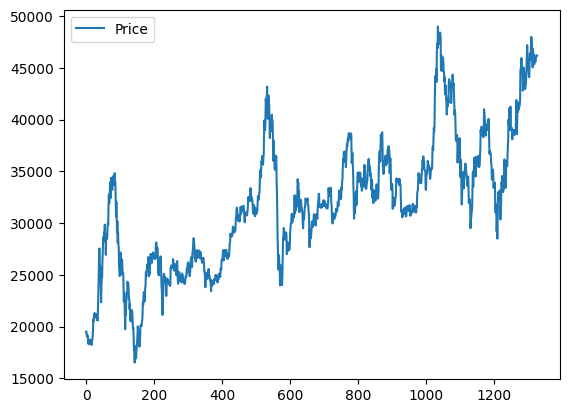

In [57]:
df.plot()

<AxesSubplot: >

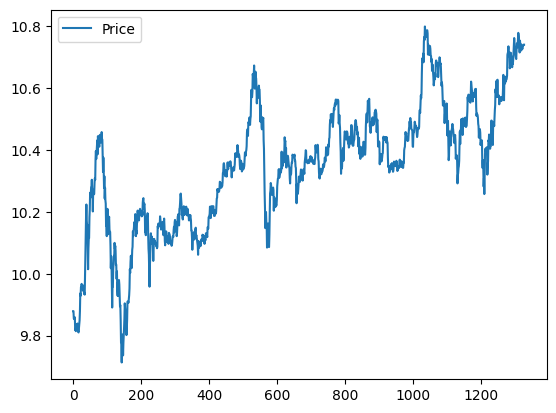

In [9]:
# Biến đổi chuỗi để ôn định phương sai
df = np.log(df)
df.plot()

In [10]:
msk = (df.index < len(df) - 265)
df_train = df[msk].copy()
df_test = df[~msk].copy()

### Bước 5: Xây dựng và huấn luyện mô hình

#### KT xem là chuỗi thời gian dừng hay hay liên tục
#### Bước 5.1 Check for stationary
#### Method #1: Time series plot
#### Method #2: ACF plot and PACF plot

d:\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


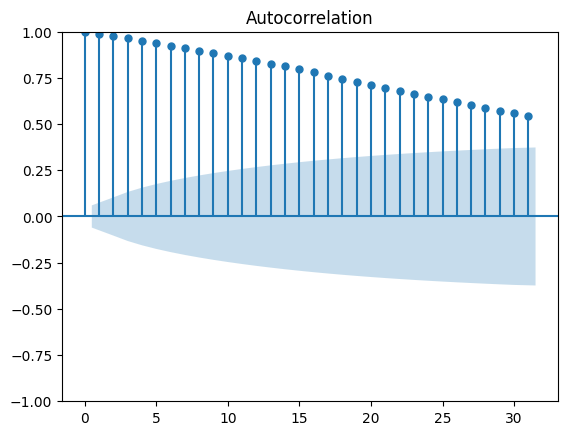

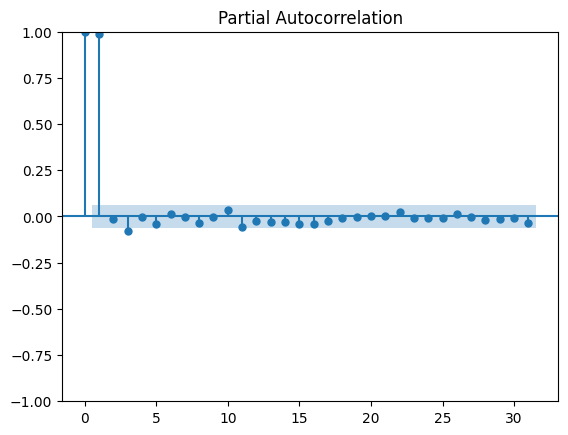

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

#### Nhận xét dựa vào biểu đồ ACF phân rã chậm, biểu đồ PACF chi tương quan 1 phần chỉ có 1 điểm tăng đột biến ở chân cột
#### => Không cố định

### Method 3: ADF test


H0: có 1 đơn vị gốc ko cố định (p> 0.05 => ko bác bỏ H0) => chuỗi thời gian ko dừng

In [11]:
# KT tính dừng bằng thống kê như kt ADF
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.1080855401566092


#### # Transform to stationary: Differencing

<AxesSubplot: >

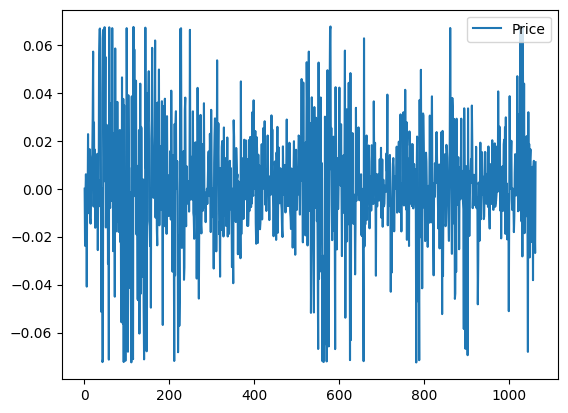

In [65]:
# sử dụng chuỗi quan sát hiện tại trừ quan sát trước đó => chuỗi mới
# Dùng dropna vì quan sát đầu tiên ko có quan sát trước đó để trừ
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

d:\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


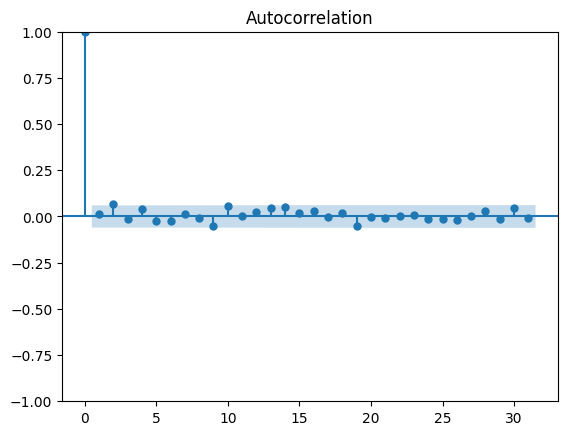

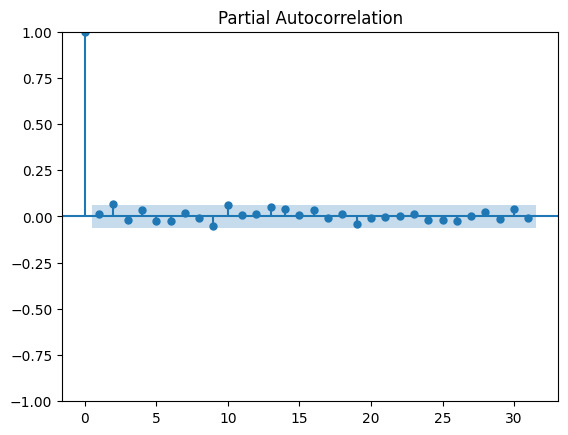

In [66]:
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

In [67]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


p -value < 0.5 => bác bỏ H0 => Chuỗi dừng
=> chọn I(d) = 1 
=> ARIMA (p,1,q)

### Bước 5.2: Determine ARIMA models parameters p, q

### Bước 5.3: Fit the ARIMA model

In [68]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1064
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2434.157
Date:                Tue, 02 May 2023   AIC                          -4862.313
Time:                        10:57:31   BIC                          -4847.407
Sample:                             0   HQIC                         -4856.665
                               - 1064                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0151      0.023      0.650      0.516      -0.030       0.061
ar.L2          0.0664      0.025      2.664      0.008       0.018       0.115
sigma2         0.0006   2.05e-05     29.301      0.0

### Bước 5.4: Make time series predictions

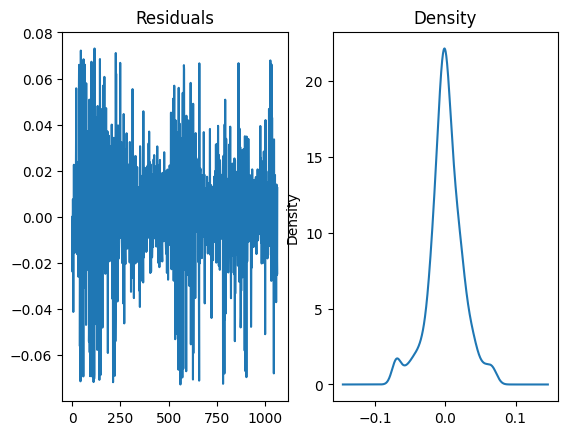

In [74]:
# Phần dư
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

d:\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


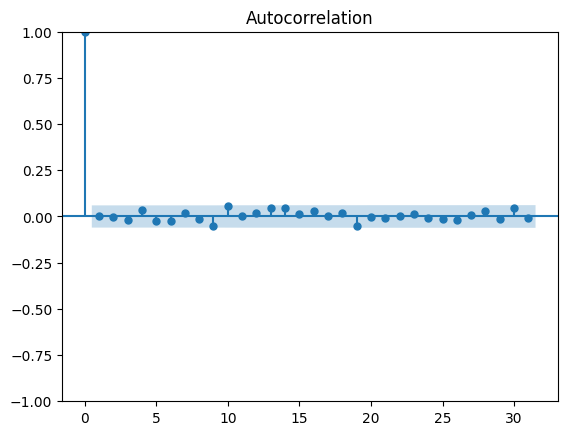

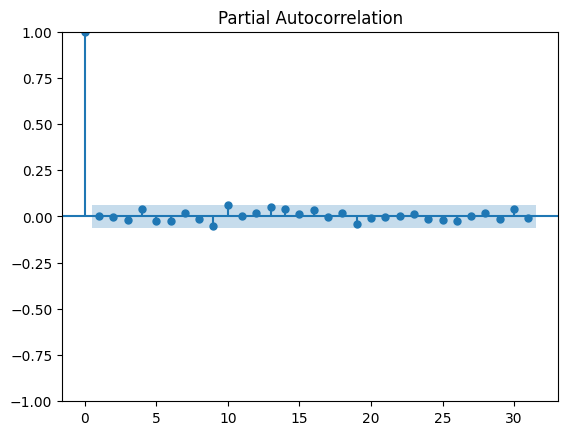

In [75]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

<AxesSubplot: >

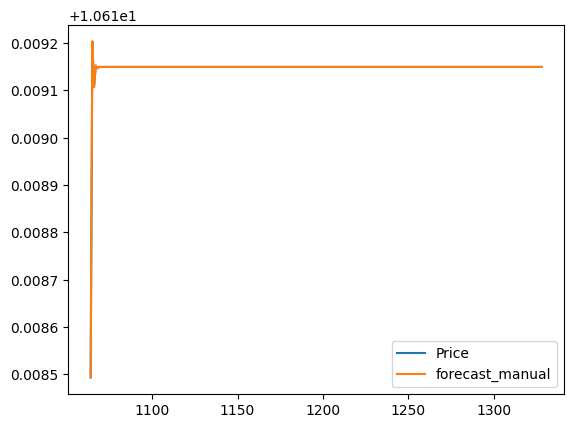

In [77]:
forecast_test = model_fit.forecast(len(df_test))
df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
df.plot()

In [82]:
# Actual vs Fitted
# model_fit.plot_predict(dynamic=False)
# plt.show()

### Optional: Auto-fit the ARIMA model

In [84]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

In [85]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1064
Model:               SARIMAX(2, 1, 0)   Log Likelihood                2434.518
Date:                Tue, 02 May 2023   AIC                          -4861.035
Time:                        11:42:50   BIC                          -4841.160
Sample:                             0   HQIC                         -4853.504
                               - 1064                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.001      0.818      0.414      -0.001       0.002
ar.L1          0.0143      0.024      0.608      0.543      -0.032       0.060
ar.L2          0.0657      0.025      2.618      0.009       0.017       0.115
sigma2         0.0006   2.05e-05     29.247      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                82.21
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Bước 5.5: Evaluate model predictions

<AxesSubplot: >

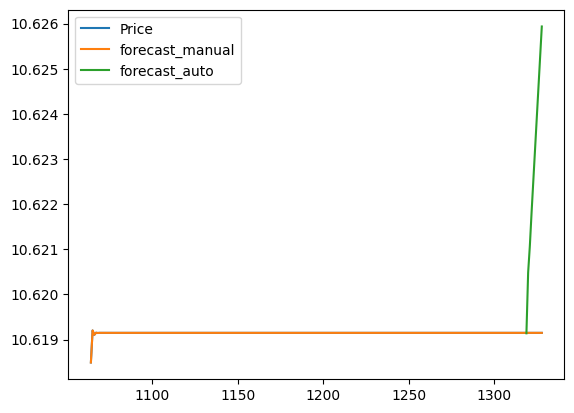

In [90]:
forecast_test_auto = auto_arima.predict(n_period=len(df_test))
df['forecast_auto'] = [None]*(len(df_train) + 255) + list(forecast_test_auto)
df.plot()

### Bước 6: Dùng mô hình để dự đoán

### Độ chính xác của mô hình

In [ ]:
# Calculate metrics
#R2
print('Độ phù hợp tập train', r2_score(y_train, train_pred))
#mse
mse_train = mean_squared_error(y_train, train_pred)
print('Mức độ sai khác giữa giá trị dự đoán và giá trị thực tế', mse_train)
#mae
mae_train = mean_absolute_error(y_train, train_pred)
print('Sai số tuyệt đối trung bình tập train:', mae_train)
#rmse
rmse_train = np.sqrt(mse_train)
print('RMSE: ', rmse_train)
#mape
#CT: mape_train = np.mean(np.abs((y_train - train_pred) / y_train)) * 100
mape_train = mean_absolute_percentage_error(y_train, train_pred)
print('Phẩn trăm Sai số tuyệt đối trung bình tập train:', mape_train)

In [ ]:
#Bảng dữ liệu dữ đoán giá cụ thể ở tập train
train_data1

In [ ]:
#R2
print('\n\nĐộ phù hợp tập test', r2_score(y_test, test_pred))
#mse
mse_test = mean_squared_error(y_test, test_pred)
print('Mức độ sai khác giữa giá trị dự đoán và giá trị thực tế', mse_test)
#mae
mae_test = mean_absolute_error(y_test, test_pred)
print('Sai số tuyệt đối trung bình tập test:', mae_test)
#rmse
rmse_test = np.sqrt(mse_test)
print('RMSE: ', rmse_test)
#mape
#CT: mape_test = np.mean(np.abs((y_test - test_pred) / y_test)) * 100
mape_test = mean_absolute_percentage_error(y_test, test_pred)
print('Phẩn trăm Sai số tuyệt đối trung bình tập test:', mape_test)

In [ ]:
#Bảng dữ liệu dữ đoán giá cụ thể ở tập test
test_data1